# importing the necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the CSV File

In [2]:
csvfile=pd.read_csv("C:\\Users\\nikhil\\Downloads\\ML Assignment 2021\\insurance (2).csv")

# Reading The Data as Dataframe

In [3]:
csvfile

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Total number of rows and columns

In [4]:
csvfile.shape

(1338, 7)

# Checking the data type

In [5]:
csvfile.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Finding the null values

In [6]:
print(csvfile.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# Dropping the missing values.

In [7]:
csvfile = csvfile.dropna() 
csvfile.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

# 5 point summary of numerical attributes

In [8]:
csvfile.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

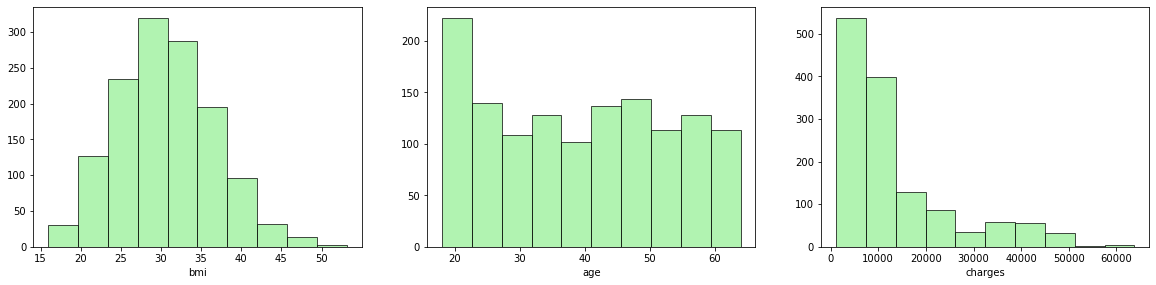

In [9]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(csvfile.bmi, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(csvfile.age, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(csvfile.charges, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’columns

In [10]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(csvfile.bmi),stats.skew(csvfile.age),stats.skew(csvfile.charges)]},
index=['bmi','age','charges'])
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


# Checking the presence of outliers in ‘bmi’, ‘age’ and‘charges columns

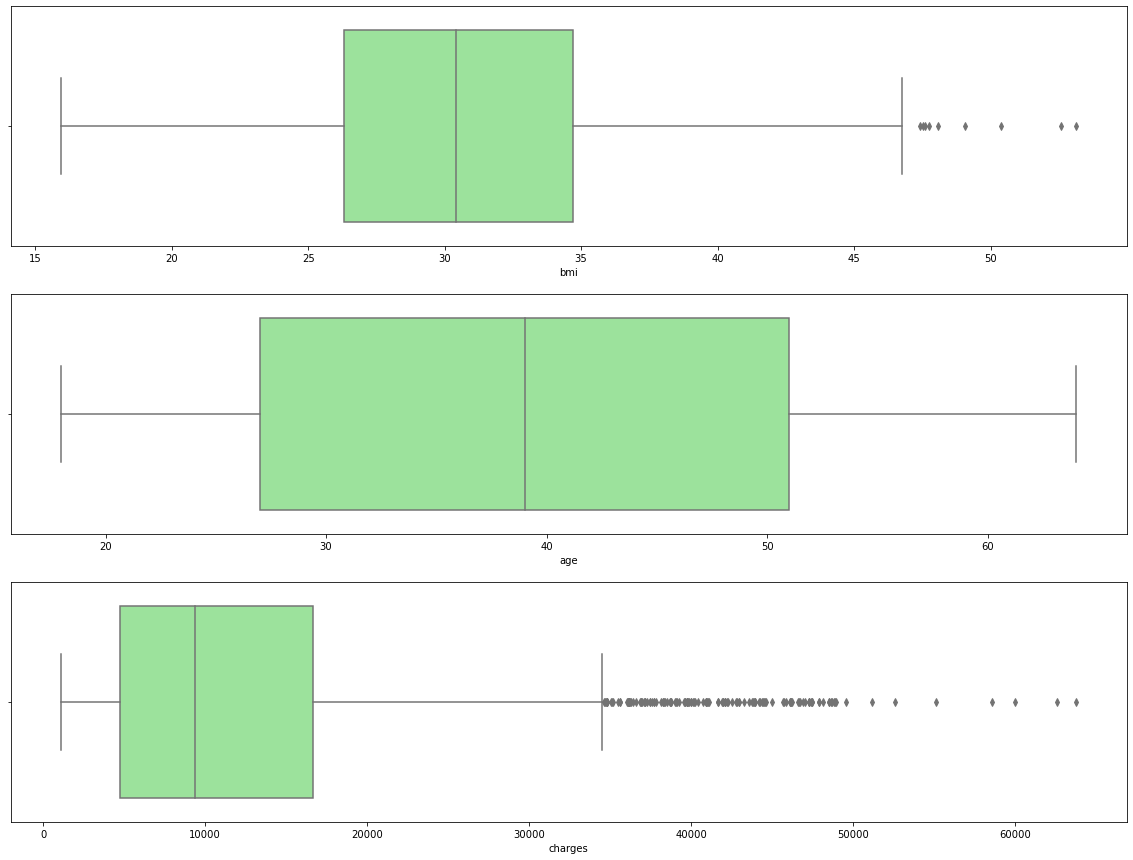

In [11]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= csvfile.bmi, color='lightgreen')

plt.subplot(3,1,2)
sns.boxplot(x= csvfile.age, color='lightgreen')

plt.subplot(3,1,3)
sns.boxplot(x= csvfile.charges, color='lightgreen')

plt.show()

# Distribution of categorical columns (include children)

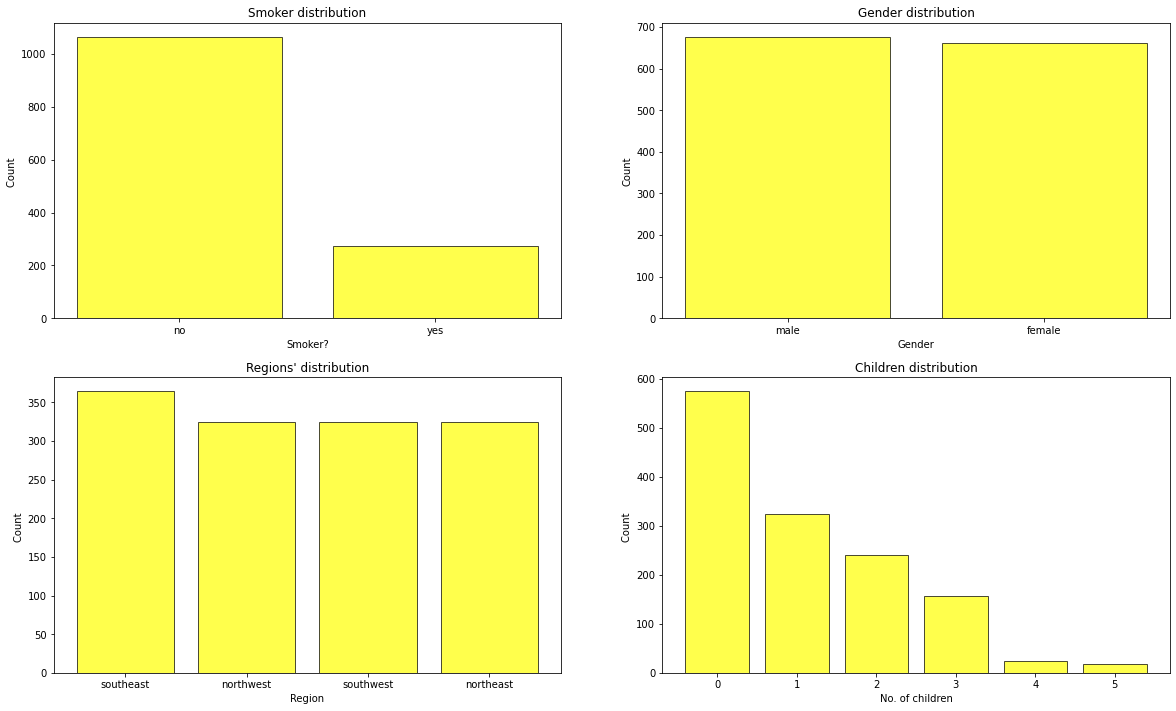

In [12]:
plt.figure(figsize=(20,25))


x = csvfile.smoker.value_counts().index    
y = [csvfile['smoker'].value_counts()[i] for i in x]  
plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'yellow',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = csvfile.sex.value_counts().index    #Values for x-axis
y1 = [csvfile['sex'].value_counts()[j] for j in x1]   

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'yellow',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = csvfile.region.value_counts().index    #Values for x-axis
y2 = [csvfile['region'].value_counts()[k] for k in x2]   

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'yellow',edgecolor = 'black',alpha = 0.7) 
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = csvfile.children.value_counts().index    
y3 = [csvfile['children'].value_counts()[l] for l in x3]

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'yellow',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

# Pair plot that includes all the columns of the data frame

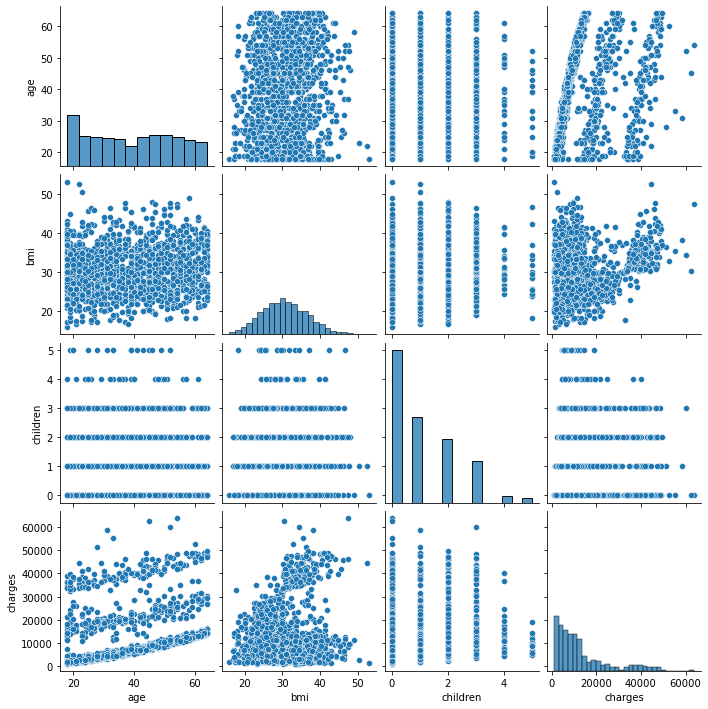

In [13]:
sns.pairplot(csvfile)
plt.show()

# Answer the following questions with statistical evidence 

**Do charges of people who smoke differ significantly from the people who don't?**

In [14]:
csvfile.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

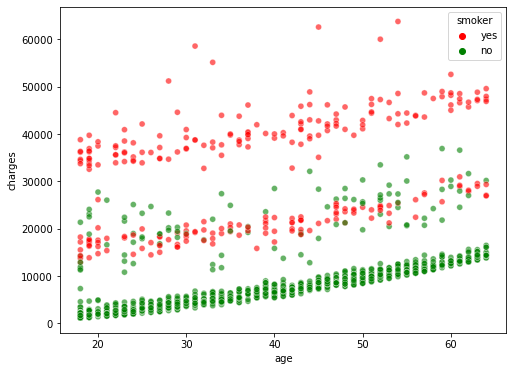

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(csvfile.age, csvfile.charges,hue=csvfile.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

**Visually the difference between charges of smokers and charges of non-smokers is apparent**

In [16]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"   

x = np.array(csvfile[csvfile.smoker == 'yes'].charges)  
y = np.array(csvfile[csvfile.smoker == 'no'].charges) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


**Does bmi of males differ significantly from that of  females?**

In [17]:
csvfile.sex.value_counts()  

male      676
female    662
Name: sex, dtype: int64

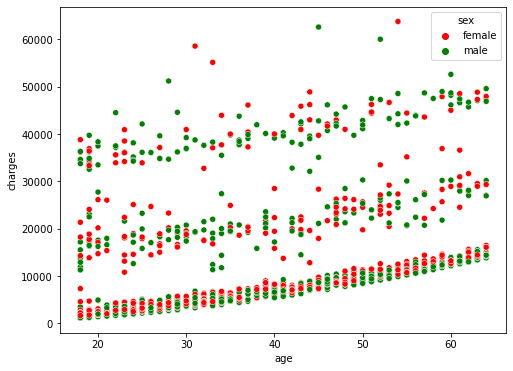

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(csvfile.age, csvfile.charges,hue=csvfile.sex,palette= ['red','green'] )
plt.show()

**Visually, there is no apparent relation between gender and charges**

In [19]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   
Ha = "Gender has an effect on bmi"   

x = np.array(csvfile[csvfile.sex == 'male'].bmi)  
y = np.array(csvfile[csvfile.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


**Is the proportion of smokers significantly different in different genders?**

In [20]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"  
Ha = "Gender has an effect on smoking habits"  

crosstab = pd.crosstab(csvfile['sex'],csvfile['smoker']) 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


**Is the distribution of bmi across women with no children, one child and two children, the same ?**

In [21]:
ak = "No. of children nks no effect on bmi"
nk = "No. of children nks an effect on bmi"


female_df = copy.deepcopy(csvfile[csvfile['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  
    print(f'{nk} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{ak} as the p_value ({p_value.round(3)}) > 0.05')

No. of children nks no effect on bmi as the p_value (0.716) > 0.05


## Data Modelling

**Feature Correlation**

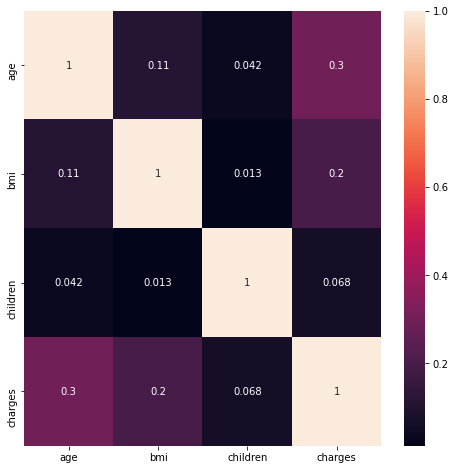

In [22]:
correlation = csvfile.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(correlation, annot=True)
plt.show()

In [23]:
csvfile.corr().style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


# Data Preprocessing

**Encoding the categorical Features**

In [24]:
# encoding sex column
csvfile.replace({'sex':{'male':0,'female':1}}, inplace=True)

 # encoding 'smoker' column
csvfile.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
csvfile.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

# Splitting the Features and Target

In [25]:
X = csvfile.drop(columns='charges', axis=1)
Y = csvfile['charges']

In [26]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [27]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Splitting the Data into Training data & Test Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model  Training

**Linear Regression**

In [30]:
LR=LinearRegression()

**Training the LogisticRegression model with Training data**

In [31]:
LR.fit(X_train, Y_train)

LinearRegression()

In [32]:
#prediction on training data
training_data_prediction =LR.predict(X_train)

In [33]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


# Building a Predictive System

In [34]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = LR.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496048
